In [2]:
# VesterAI - Notebook 05: Modeling (Classification & Regression)

"""
Objective:
Use engineered features (sentiment + technical indicators) to:
- Train models to classify price movement (up/down)
- Train models to regress next-day return

Evaluation metrics:
- Classification: Accuracy, Precision, Recall, F1-score
- Regression: R-squared, RMSE
"""

'\nObjective:\nUse engineered features (sentiment + technical indicators) to:\n- Train models to classify price movement (up/down)\n- Train models to regress next-day return\n\nEvaluation metrics:\n- Classification: Accuracy, Precision, Recall, F1-score\n- Regression: R-squared, RMSE\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

In [4]:
# Load modeling dataset
model_data = pd.read_csv("../data/processed/AAPL_model_data.csv")
model_data["Date"] = pd.to_datetime(model_data["Date"])
model_data = model_data.sort_values("Date").reset_index(drop=True)
model_data.head()

,Date,Close,High,Low,Open,Volume,twitter_sentiment,news_sentiment,reddit_sentiment,return,...,rolling_vol_3,rsi_14,macd,macd_signal,ema_12,ema_26,bollinger_h,bollinger_l,bollinger_m,obv
0,2020-02-25,69.910980,73.417696,69.437761,73.034266,230673600,0.0,0.0,0.0,-0.033872,...,0.012452,30.770217,-0.372241,0.561673,75.747832,76.120073,81.620885,72.334281,76.977583,-82898400
1,2020-02-26,71.020020,72.289234,69.527545,69.534825,198054800,0.0,0.0,0.0,0.015864,...,0.033353,35.233280,-0.721815,0.304976,75.020477,75.742291,82.003643,71.362111,76.682877,115156400
2,2020-02-27,66.377571,69.406208,66.241671,68.217082,320605600,0.0,0.0,0.0,-0.065368,...,0.040956,27.299508,-1.357810,-0.027581,73.690799,75.048608,82.960093,69.191003,76.075548,-205449200
3,2020-02-28,66.338745,67.564279,62.215630,62.431618,426510000,0.0,0.0,0.0,-0.000585,...,0.042946,27.244254,-1.843720,-0.390809,72.559714,74.403433,83.460116,67.483818,75.471967,-631959200
4,2020-03-02,72.514908,73.153155,67.396809,68.503424,341397200,0.0,0.0,0.0,0.093100,...,0.079672,45.975879,-1.710722,-0.654792,72.552820,74.263543,83.440705,67.261347,75.351026,-290562000


In [5]:
# Binary classification target: Predict if next day's return is positive (1) or not (0)
model_data["target_class"] = (model_data["return"].shift(-1) > 0).astype(int)

# Regression target: Next day return
model_data["target_return"] = model_data["return"].shift(-1)

# Drop final row (NaN in target)
model_data.dropna(subset=["target_class", "target_return"], inplace=True)

In [6]:
# Only drop columns that exist in the dataset
columns_to_exclude = ["Date", "Open", "High", "Low", "Adj Close", "Close", "Volume", "return", "target_class", "target_return"]
drop_cols = [col for col in columns_to_exclude if col in model_data.columns]

# Remaining columns are features
features = model_data.drop(columns=drop_cols).columns.tolist()

X = model_data[features]
y_class = model_data["target_class"]
y_reg = model_data["target_return"]

print("Selected features for modeling:")
print(features)

Selected features for modeling:
['twitter_sentiment', 'news_sentiment', 'reddit_sentiment', 'Close_lag1', 'return_lag1', 'rolling_mean_3', 'rolling_vol_3', 'rsi_14', 'macd', 'macd_signal', 'ema_12', 'ema_26', 'bollinger_h', 'bollinger_l', 'bollinger_m', 'obv']


In [7]:
X_train, X_test, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, shuffle=False)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, shuffle=False)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.42      1.00      0.59       108
           1       0.00      0.00      0.00       148

    accuracy                           0.42       256
   macro avg       0.21      0.50      0.30       256
weighted avg       0.18      0.42      0.25       256

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.89      0.58       108
           1       0.61      0.13      0.21       148

    accuracy                           0.45       256
   macro avg       0.52      0.51      0.39       256
weighted avg       0.53      0.45      0.37       256



/home/tandel.r/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tandel.r/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tandel.r/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


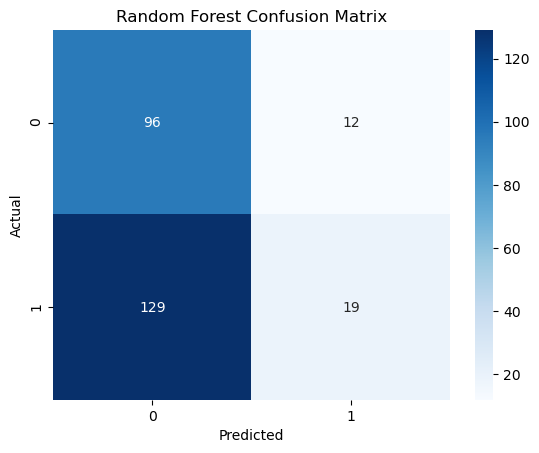

In [8]:
# Logistic Regression
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train_cls)
y_pred_log = log_clf.predict(X_test)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train_cls)
y_pred_rf = rf_clf.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test_cls, y_pred_log))

print("Random Forest Classification Report:")
print(classification_report(y_test_cls, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_cls, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_reg)
y_pred_lin = lin_reg.predict(X_test)

# XGBoost (optional, install if needed)
try:
    from xgboost import XGBRegressor
    xgb_reg = XGBRegressor()
    xgb_reg.fit(X_train, y_train_reg)
    y_pred_xgb = xgb_reg.predict(X_test)

    print("XGBoost Evaluation:")
    print(f"R²: {r2_score(y_test_reg, y_pred_xgb):.4f}")
    print(f"RMSE: {mean_squared_error(y_test_reg, y_pred_xgb, squared=False):.6f}")
except ImportError:
    print("XGBoost not installed. Skipping.")

# Linear Regression Evaluation
print("Linear Regression Evaluation:")
print(f"R²: {r2_score(y_test_reg, y_pred_lin):.4f}")
print(f"RMSE: {mean_squared_error(y_test_reg, y_pred_lin, squared=False):.6f}")

XGBoost not installed. Skipping.
Linear Regression Evaluation:
R²: -0.1037
RMSE: 0.016309


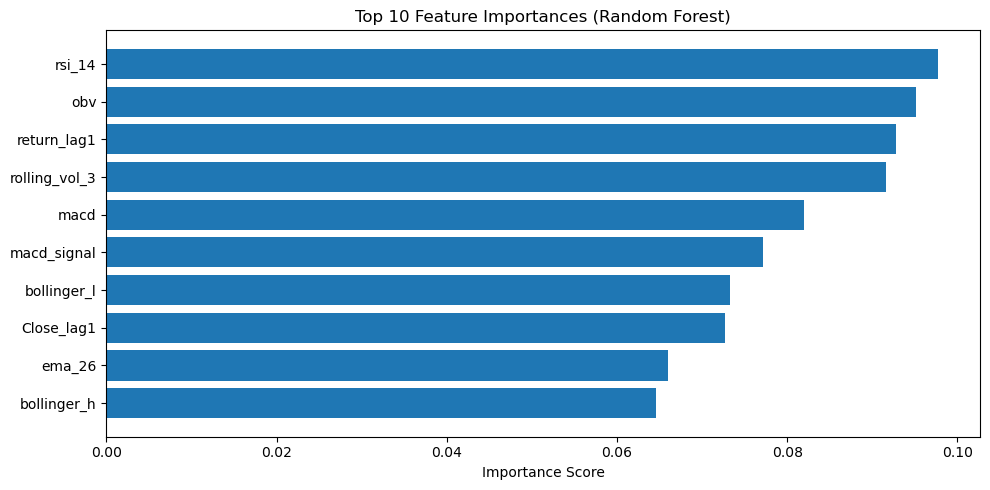

In [10]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 5))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [11]:
print("Modeling Summary:")
print("- Classification Accuracy (RF):", (y_pred_rf == y_test_cls).mean())
print("- Regression R² (Linear):", r2_score(y_test_reg, y_pred_lin))

print("\nNext: We can tune hyperparameters, ensemble models, or visualize error trends.")

Modeling Summary:
- Classification Accuracy (RF): 0.44921875
- Regression R² (Linear): -0.10370375448085634

Next: We can tune hyperparameters, ensemble models, or visualize error trends.


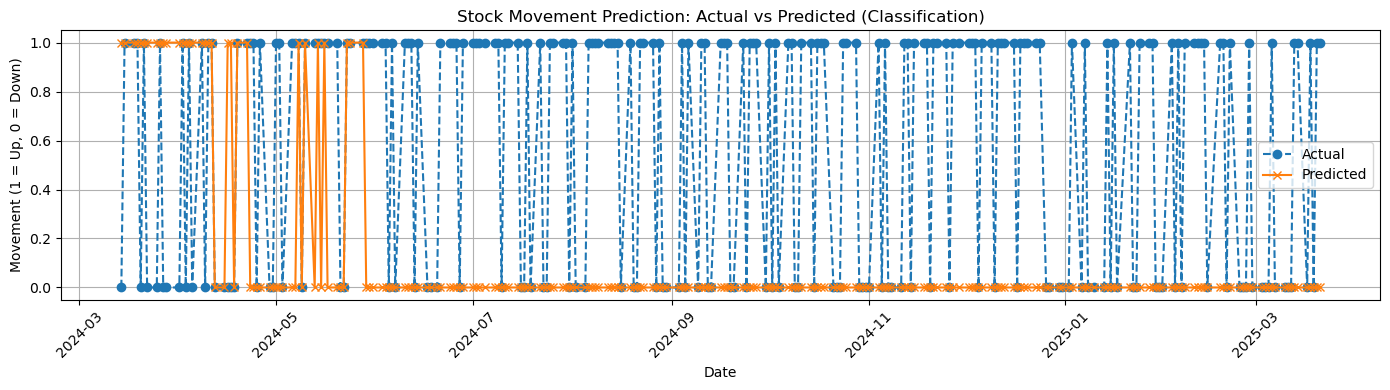

In [12]:
# Convert to 1D NumPy arrays explicitly
test_dates = model_data.loc[X_test.index, "Date"].values.flatten()
actual = y_test_cls.values.flatten()
predicted = np.array(y_pred_rf).flatten()

# Final plot
plt.figure(figsize=(14, 4))
plt.plot(test_dates, actual, label="Actual", linestyle="--", marker="o")
plt.plot(test_dates, predicted, label="Predicted", linestyle="-", marker="x")
plt.title("Stock Movement Prediction: Actual vs Predicted (Classification)")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Movement (1 = Up, 0 = Down)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

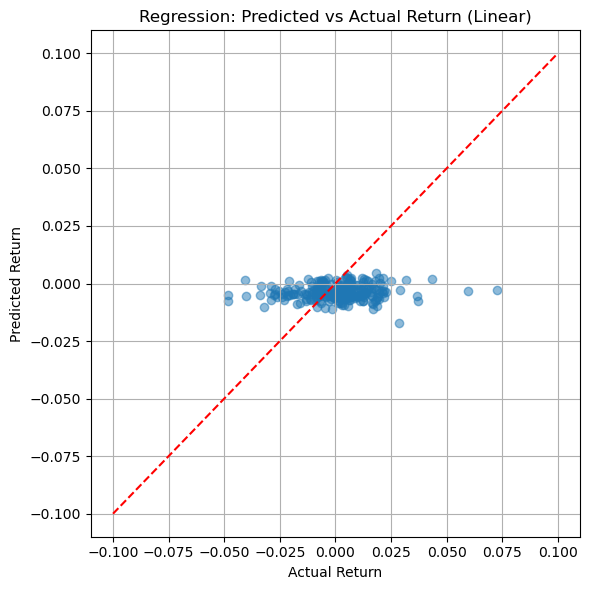

In [13]:
# Scatter plot of predicted vs actual return
plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, y_pred_lin, alpha=0.5)
plt.title("Regression: Predicted vs Actual Return (Linear)")
plt.xlabel("Actual Return")
plt.ylabel("Predicted Return")
plt.grid(True)
plt.plot([-0.1, 0.1], [-0.1, 0.1], "--", color="red")  # 45-degree line
plt.tight_layout()
plt.show()

In [14]:
import joblib
import os

model_dir = "../models"
os.makedirs(model_dir, exist_ok=True)

# Save all models
joblib.dump(rf_clf, os.path.join(model_dir, "random_forest_classifier.joblib"))
joblib.dump(log_clf, os.path.join(model_dir, "logistic_classifier.joblib"))
joblib.dump(lin_reg, os.path.join(model_dir, "linear_regression.joblib"))

try:
    joblib.dump(xgb_reg, os.path.join(model_dir, "xgboost_regression.joblib"))
except:
    pass  # XGBoost not installed

print("Models saved to /models/")

Models saved to /models/


In [15]:
# Optional test: Reload RF classifier and predict again
rf_loaded = joblib.load(os.path.join(model_dir, "random_forest_classifier.joblib"))
sample_preds = rf_loaded.predict(X_test)
print("Reloaded model test accuracy:", (sample_preds == y_test_cls).mean())

Reloaded model test accuracy: 0.44921875


In [18]:
# Save predicted and actual values for dashboard
pred_df = model_data.loc[y_test_cls.index, ["Date"]].copy()
pred_df["predicted"] = y_pred_rf
pred_df["actual"] = y_test_cls.values

pred_df.to_csv("../data/processed/AAPL_predictions.csv", index=False)
print("Classification predictions saved for dashboard.")

Classification predictions saved for dashboard.
